# Progetto di Metodi Informatici per la Gestione Aziendale

## Progetto base

In [10]:
#!pip install pandas
import pandas as pd
import os
import numpy as np

Importazione del dataset delle review:

In [11]:
import json

data = []
pwd = os.getcwd()
if "Richard" in pwd:
    file_path = '/Users/Richard/Desktop/Progetto Metodi aziendale/Proj_metodi_informatici/data/Books.jsonl'
else:
    file_path = '/Users/susannamau/Dev/metodi_informatici/Books.jsonl'
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if i == 1000:
            break
        data.append(json.loads(line))

In [12]:
data[1:2]

[{'rating': 5.0,
  'title': 'Updated: after 1st arrived damaged this one is perfect',
  'text': 'Updated: after first book arrived very damaged the replacement arrived in perfect condition.',
  'images': [],
  'asin': '0593235657',
  'parent_asin': '0593235657',
  'user_id': 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ',
  'timestamp': 1640629604904,
  'helpful_vote': 1,
  'verified_purchase': True}]

Mi prendo i dati dello user

### 1. Analisi esplorativa (statistiche descrittive, analisi correlazione)
To perform an exploratory analysis on this dataset, we perform the following steps:

* Trasformazione del dataset in un dataframe Pandas,
* Controllo delle informazioni di base del dataframe come il numero di righe, di colonne e i tipi delle variabili,
* Controllo dei valori mancanti,
* Statistiche descrittive delle variabili numeriche (rating e helpful_vote),
* Visualizzazione dei dati.

Trasformazione in un dataframe Pandas:

In [13]:
df = pd.DataFrame(data)
df.head()
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,1.0,Not a watercolor book! Seems like copies imo.,It is definitely not a watercolor book. The p...,[{'small_image_url': 'https://m.media-amazon.c...,B09BGPFTDB,B09BGPFTDB,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1642399598485,0,True
1,5.0,Updated: after 1st arrived damaged this one is...,Updated: after first book arrived very damaged...,[],0593235657,0593235657,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640629604904,1,True
2,5.0,Excellent! I love it!,I bought it for the bag on the front so it pai...,[],1782490671,1782490671,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640383495102,0,True
3,5.0,Updated after 1st arrived damaged. Excellent,Updated: after 1st arrived damaged the replace...,[],0593138228,0593138228,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1640364906602,0,False
4,5.0,Beautiful patterns!,I love this book! The patterns are lovely. I ...,[{'small_image_url': 'https://m.media-amazon.c...,0823098079,0823098079,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1637312253230,0,True
...,...,...,...,...,...,...,...,...,...,...
995,5.0,A feast for body and soul,"Based on Jan Karon's Mitford series, the Mitfo...",[],B0017HZ0Y6,0670032395,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245504975000,16,True
996,5.0,"A beautiful, heartbreaking look at love and lo...","Mahbod Seraji's haunting ""Rooftops of Tehran"" ...",[],045122681X,045122681X,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245501300000,3,False
997,3.0,"A fleeting, delicate tale as light as rosewater","In ""Rosewater and Soda Bread,"" Marsha Mehran's...",[],081297249X,081297249X,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1245111599000,2,False
998,5.0,"Hip, quirky, romantic tale of film noir",Ever felt like there's a nagging voice in your...,[],0425218384,0425218384,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1244860930000,1,False


Ho importato le prime 1000 righe perché il file intero era troppo pesante. Ci sono 10 colonne che rappresentano:
 * Rating (float): rating of the product (from 1.0 to 5.0). It will be transformed in a categorical variable,
* Title	(str) : title of the user review,
* Text (str): text body of the user review,
* Images (list): images that users post after they have received the product. Each image has different sizes (small, medium, large), represented by the small_image_url, medium_image_url, and large_image_url respectively,
* asin (str): ID of the product,
* parent_asin (str): parent ID of the product,
* user_id (str): ID of the reviewer,
* timestamp (int): time of the review (unix time),
* verified_purchase (boolean): user purchase verification,
* helpful_vote (int): helpful votes of the review.

In [14]:
df['rating'] = df['rating'].astype('int')

Alcune statistiche descrittive delle variabili numeriche del dataset. Le statistiche descrittive su timestamp sono poco informative a causa della natura della variabile.

In [15]:
df.describe()

,rating,timestamp,helpful_vote
count,1000.000000,1.000000e+03,1000.000000
mean,4.477000,1.477203e+12,4.032000
std,0.948879,1.116759e+11,15.863563
min,1.000000,1.129661e+12,0.000000
25%,4.000000,1.403895e+12,0.000000
50%,5.000000,1.480937e+12,0.000000
75%,5.000000,1.561830e+12,2.000000
max,5.000000,1.678065e+12,330.000000


Mentre la variabile rating è molto sbilanciata verso sinistra (più della metà delle osservazioni hanno rating 5), la variabile helpful_vote è molto sbilanciata verso destra (più della metà delle osservazioni hanno valore 0).

Conteggio di quante reviews ci sono per ogni codice prodotto (asin) e del rating medio:

In [16]:
df_grouped = df.groupby('asin').agg(number_of_reviews = pd.NamedAgg(column='asin', aggfunc='count'),
                                    average_rating = pd.NamedAgg(column='rating', aggfunc='mean')).sort_values(by='number_of_reviews', ascending=False)
df_grouped.head()

,number_of_reviews,average_rating
asin,,
1741799953,2,4.0
0547636474,2,4.5
1454710179,2,5.0
B00K7MCE3C,2,4.5
1578563232,2,5.0


Conteggio dei valori mancanti:

In [17]:
missing_values = df.isnull().sum()
print(missing_values)

rating               0
title                0
text                 0
images               0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
dtype: int64


Nelle osservazioni importate non ci sono valori mancanti.

Visualizzazione della distribuzione dei ratings:

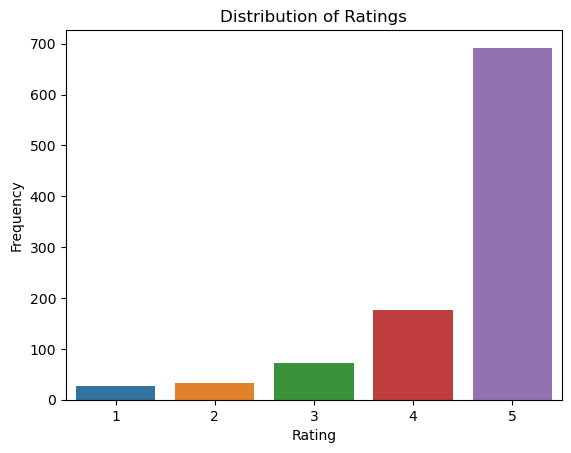

In [18]:
#!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='rating', data=df)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

La distribuzione dei ratings è asimmetrica negativa: le osservazioni con rating 5 sono molto più frequenti di quelle con punteggi inferiori.

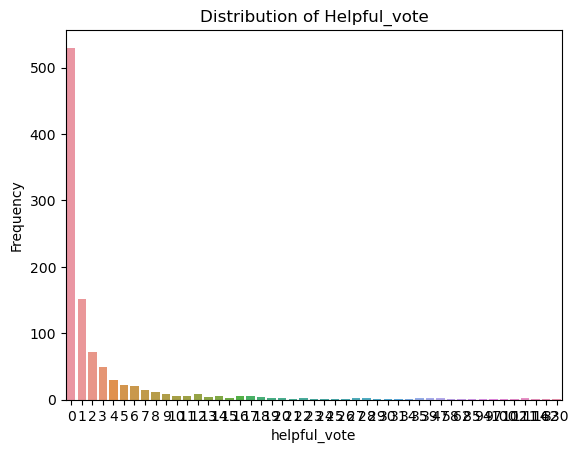

In [19]:
sns.countplot(x='helpful_vote', data=df)
plt.title('Distribution of Helpful_vote')
plt.xlabel('helpful_vote')
plt.ylabel('Frequency')
plt.show()

La distribuzione è asimmetrica positiva, con uno sbilanciamento importante verso destra.

### 2. Identificazione della configurazione ottimale dell’algoritmo K-NN per la predizione dei rating
In questo punto dovranno quindi essere testate le diverse combinazioni: similarità, valore di K, user/item based. Tramite le diverse metriche di performance (MSE e RMSE) individuare di conseguenza la configurazione ottimale.

In [20]:
df.columns #guardo le colonne di df che contiene le informazioni della tabella User

Index(['rating', 'title', 'text', 'images', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase'],
      dtype='object')

Creo la matrice User-Books
righe -> Utenti
colonne -> Libri con il loro codice
valore cella -> Rating dell'utente per il libro

In [17]:
user_item_matrix = df.pivot_table(index='user_id', columns='asin', values='rating', aggfunc='mean').fillna(0)

In [36]:
user_item_matrix = user_item_matrix.astype(int)
user_item_matrix

asin,0008119090,0060663723,0060734000,0060835575,0061148989,0061284416,0061375837,0061688592,0061688649,0061713244,...,B09F1JCGWB,B09HQKGZJY,B09JBKMY5W,B09M5LJYLT,B09NRDSSC7,B09SBNT62Z,B09TX1HS1Y,B09YVRPXC3,B0BB5Z9DM9,B0BQ5C8H2C
user_id,,,,,,,,,,,,,,,,,,,,,
AE2TA5GQH4JI5RQ4W5H5PQOVYBGA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE3ZEVN65B3MWKIBLFRBGMJDGJCA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE4KVNO5P6N6SP6CQTZTIDHEAWFQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AE7Y5RLYIKHOZB5NKKOEKYG2SPSQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AHX4XWVVQUKT3FCNWCVASDF4Q56Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AHXBL3QDWZGJYH7A5CMPFNUPMF7Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AHY55PORR7VYL72JBUYNSO6KCA5A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


 # PROBABILMENTE QUESTA PARTE E' SBAGLIATA

🔮 Rating Prediction with k-NN

Now that we have a way to compare movies, we can predict the ratings using k-NN:

Step 1: Find similarity scores between the movie and all the movies the user rated.
Step 2: Sort and choose top k nearest neighbors of the movie.
Step 3: Take the weighted average and predict the ratings.

In [19]:
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [22]:
query_index = np.random.choice(user_item_matrix.shape[0]) # Selezioni un user_id a caso
query_index

131

In [25]:
user = user_item_matrix.index[query_index] # stampo user_id selezionato
user

'AHGAOIZVODNHYMNCBV4DECZH42UQ'

In [ ]:
book_voted = df[ df['user_id'] == user] # book voted by user
book_voted

In [27]:
# trovo i quali sono gli utenti simili a quello selezionato
distances, indices = model_knn.kneighbors(user_item_matrix.iloc[query_index,:].values.reshape(1,-1), n_neighbors = 20) 


E:\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [28]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print(f'Recommendation for {user_item_matrix.index[query_index]}:\n')
    else:
        print(f'{i}: {user_item_matrix.index[indices.flatten()[i]]}, with distance of {distances.flatten()[i]}')


Recommendation for AHGAOIZVODNHYMNCBV4DECZH42UQ:

1: AGHWZRZY7UYGZAYBZ2JADLTCSKKQ, with distance of 1.0
2: AGI5WCODFNNY5MKGED2667RA4ZAA, with distance of 1.0
3: AGIF4RXMGYGGOETIN7H7SHI2HTGA, with distance of 1.0
4: AGJ2JO45F52FXDSPOGK3PKXU5OKA, with distance of 1.0
5: AGJSTXSEWFVQWVQINO6QKMNBUUNA, with distance of 1.0
6: AGKASBHYZPGTEPO6LWZPVJWB2BVA, with distance of 1.0
7: AGKFRCDY4WBW4RH6GFYFJ3T3XBSA, with distance of 1.0
8: AGKHLEW2SOWHNMFQIJGBECAF7INQ, with distance of 1.0
9: AGLQDDJTHRGIY4KWEXLA3YBD47PQ, with distance of 1.0
10: AGOWLR52GJKEQ6ARUX5V6TJP7QLA, with distance of 1.0
11: AGPBYMEVZKTYSCLNSN4YDADOIIKQ, with distance of 1.0
12: AGPR2UDFIJJCBA3EKFEEAJBWKROQ, with distance of 1.0
13: AGPXNVE7IY3QVMN7YKKUQT3BPHUQ, with distance of 1.0
14: AGQ2BWZLHY4WKCNHD3WDWAFF45CQ, with distance of 1.0
15: AGTP4V3GFJ3YGVKDYXDK3SJ5IAYA, with distance of 1.0
16: AGU7O3UW7U2UMZGSZMKNZ6K6VHUA, with distance of 1.0
17: AGGZ357AO26RQZVRLGU4D4N52DZQ, with distance of 1.0
18: AGVVUU3QRQBHNASSGI5Y

Test tra i risultati

In [42]:
def cos_sim(a, b):
  """
  Compute the cosine similarity between two vectors.

  :param a: ndarray (n_features, )
  :param b: ndarray (n_features, )
  """
  return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
    # np.dot(a, b) -> prodotto scalare tra putno a e b / norma a * norma b

In [45]:
# Assuming user_item_matrix is your DataFrame and 'user_id' is the index
first = user_item_matrix.loc['AGHWZRZY7UYGZAYBZ2JADLTCSKKQ'].values
second = user_item_matrix.loc['AHGAOIZVODNHYMNCBV4DECZH42UQ'].values

print(cos_sim(first,second))



0.0


 # FINE PARTE SBAGLIATA

 # Collaborative Filter

In [33]:
pip install scikit-surprise

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: E:\anaconda\python.exe -m pip install --upgrade pip


In [34]:
from surprise import Dataset, Reader

In [62]:
# Convert the pandas DataFrame into surprise dataset format
reader = Reader(rating_scale=(1, 5))
dataset_surprise = Dataset.load_from_df(rating_matrix[['user_id', 'asin', 'rating']], reader)

In [63]:
rating_matrix = df[['user_id', 'asin', 'rating']]
rating_matrix

,user_id,asin,rating
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B09BGPFTDB,1
1,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0593235657,5
2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1782490671,5
3,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0593138228,5
4,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0823098079,5
...,...,...,...
995,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,B0017HZ0Y6,5
996,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,045122681X,5
997,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,081297249X,3
998,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,0425218384,5


In [37]:
from surprise import accuracy, KNNBasic
from surprise import model_selection

In [38]:
# Initialize the algorithm
algo = KNNBasic()

In [39]:
# Split the dataset into train and test set
trainset, testset = model_selection.train_test_split(dataset_surprise, test_size=0.2, random_state=0)

In [40]:
# Train and test the algorithm
algo.fit(trainset)
predictions = algo.test(testset)
# Compute metrics
mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
MSE: 0.9490
RMSE: 0.9742


In [41]:
# Get a prediction for specific users and items.
uid = 'AFKZENTNBQ7A7V7UXW5JJI6UGRYQ'
iid = '0593235657'
pred = algo.predict(uid, iid, r_ui=3, verbose=True)


user: AFKZENTNBQ7A7V7UXW5JJI6UGRYQ item: 0593235657 r_ui = 3.00   est = 5.00   {'actual_k': 1, 'was_impossible': False}


In [ ]:
#r_ui è il rating reale
#est è il valore predetto dal modello
#actual_k n° di neighbors più prossimi (k) che sono stati effettivamente utilizzati per calcolare la stima del rating.
#'was_impossible': False -> Se è possibile o meno fare previsione: True -> impossibile, False -> possibileS

In [45]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate
import numpy as np

# Assume 'rating_matrix' is already defined as your DataFrame
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(rating_matrix[['user_id', 'asin', 'rating']], reader)

# Define the list of configurations to test
sim_options = {
    'cosine': {'name': 'cosine'},
    'pearson': {'name': 'pearson'},
    'pearson_baseline': {'name': 'pearson_baseline'},
    'msd': {'name': 'msd'}
}
k_values = [5, 10, 20]
user_item_based = [True, False]

best_rmse = float('inf')
best_mse = float('inf')
best_config_rmse = {}
best_config_mse = {}

# Test all combinations
for sim_name, sim_option in sim_options.items():
    for k in k_values:
        for user_based in user_item_based:
            algo = KNNBasic(sim_options={'name': sim_option['name'], 'user_based': user_based}, k=k)
            results = cross_validate(algo, data, measures=['RMSE', 'MSE'], cv=3, verbose=False)
            avg_rmse = np.mean(results['test_rmse'])
            avg_mse = np.mean(results['test_mse'])

            # Track the best RMSE
            if avg_rmse < best_rmse:
                best_rmse = avg_rmse
                best_config_rmse = {'similarity': sim_name, 'k': k, 'user_based': user_based}

            # Track the best MSE
            if avg_mse < best_mse:
                best_mse = avg_mse
                best_config_mse = {'similarity': sim_name, 'k': k, 'user_based': user_based}

            print(f"Sim: {sim_name}, K: {k}, User-Based: {user_based}, RMSE: {avg_rmse}, MSE: {avg_mse}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Sim: cosine, K: 5, User-Based: True, RMSE: 0.9471446681804595, MSE: 0.9104979574794102
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Sim: cosine, K: 5, User-Based: False, RMSE: 0.9484506059899106, MSE: 0.9009069768065153
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Sim: cosine, K: 10, User-Based: True, RMSE: 0.9481400640042069, MSE: 0.9011102041437659
Computing the cosine similarity matrix...
Done comput

In [46]:

# Print the best configurations
print("Best RMSE Configuration:", best_config_rmse, "with RMSE:", best_rmse)
print("Best MSE Configuration:", best_config_mse, "with MSE:", best_mse)

Best RMSE Configuration: {'similarity': 'pearson', 'k': 20, 'user_based': False} with RMSE: 0.9467902865431294
Best MSE Configuration: {'similarity': 'pearson_baseline', 'k': 5, 'user_based': True} with MSE: 0.8995514950334962


### 3. Filling della matrice di rating con la configurazione ottimale

In [47]:
trainset = data.build_full_trainset()

In [48]:
# Configurazione ottimale per RMSE
best_sim_option = {
    'name': best_config_rmse['similarity'],
    'user_based': best_config_rmse['user_based']
}

In [49]:
algo = KNNBasic(sim_options=best_sim_option, k=best_config_rmse['k'])
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


In [51]:
from surprise import PredictionImpossible

# Creazione di una nuova matrice di rating completa
full_rating_matrix = rating_matrix.copy()

# Trova tutti gli utenti e gli articoli unici nel dataset
all_users = rating_matrix['user_id'].unique()
all_items = rating_matrix['asin'].unique()


In [53]:
# Creare una lista per raccogliere tutte le nuove righe
new_rows = []

# Predire i rating mancanti
for user in all_users:
    for item in all_items:
        if not ((rating_matrix['user_id'] == user) & (rating_matrix['asin'] == item)).any():
            try:
                pred = algo.predict(user, item)
                new_rows.append({'user_id': user, 'asin': item, 'rating': pred.est})
            except PredictionImpossible:
                continue

# Aggiungere le nuove righe al DataFrame originale
if new_rows:
    full_rating_matrix = pd.concat([full_rating_matrix, pd.DataFrame(new_rows)], ignore_index=True)

print("Matrice di rating completata con predizioni.")

Matrice di rating completata con predizioni.


In [56]:
full_rating_matrix.head(90)

,user_id,asin,rating
0,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,B09BGPFTDB,1.0
1,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0593235657,5.0
2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,1782490671,5.0
3,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0593138228,5.0
4,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,0823098079,5.0
...,...,...,...
85,AHSXXZHYMXDRVKC643TJZYQ7XGYA,048648243X,1.0
86,AH6CATODIVPVUOJEWHRSRCSKAOHA,1592233236,5.0
87,AH6CATODIVPVUOJEWHRSRCSKAOHA,1454710179,5.0
88,AH6CATODIVPVUOJEWHRSRCSKAOHA,1592238548,5.0


### 4. Segmentazione degli utenti in base alle preferenze
Algoritmo di clustering K-MEANS con cosine similarity.

### 5. Creazione per ogni utente della lista degli n items (top k items) da consigliare
(es. considerando il rating predetto)

### 6. Filling della matrice di rating attraverso Matrix Factorization in aggiunta a K-NN e confronto dei risultati ottenuti in termini di MSE e RMSE